In [33]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
df.deposit.value_counts(normalize = True)


no     0.52616
yes    0.47384
Name: deposit, dtype: float64

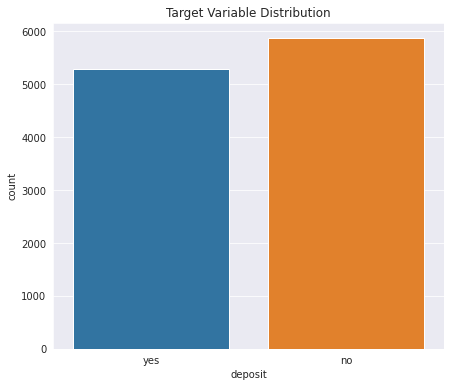

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 6))
sns.countplot(x= df.deposit)
plt.title('Target Variable Distribution')
plt.show()

In [37]:
print(df.month.value_counts(), "\n")
print(df.job.value_counts())

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64 

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


In [38]:
labelencoder = LabelEncoder()
df["job"] = labelencoder.fit_transform(df["job"])
labelencoder = LabelEncoder()
df["marital"] = labelencoder.fit_transform(df["marital"])
labelencoder = LabelEncoder()
df["education"] = labelencoder.fit_transform(df["education"])
labelencoder = LabelEncoder()
df["default"] = labelencoder.fit_transform(df["default"])
labelencoder = LabelEncoder()
df["housing"] = labelencoder.fit_transform(df["housing"])
labelencoder = LabelEncoder()
df["loan"] = labelencoder.fit_transform(df["loan"])
labelencoder = LabelEncoder()
df["contact"] = labelencoder.fit_transform(df["contact"])
labelencoder = LabelEncoder()
df["month"] = labelencoder.fit_transform(df["month"])
labelencoder = LabelEncoder()
df["poutcome"] = labelencoder.fit_transform(df["poutcome"])
labelencoder = LabelEncoder()
df["deposit"] = labelencoder.fit_transform(df["deposit"])

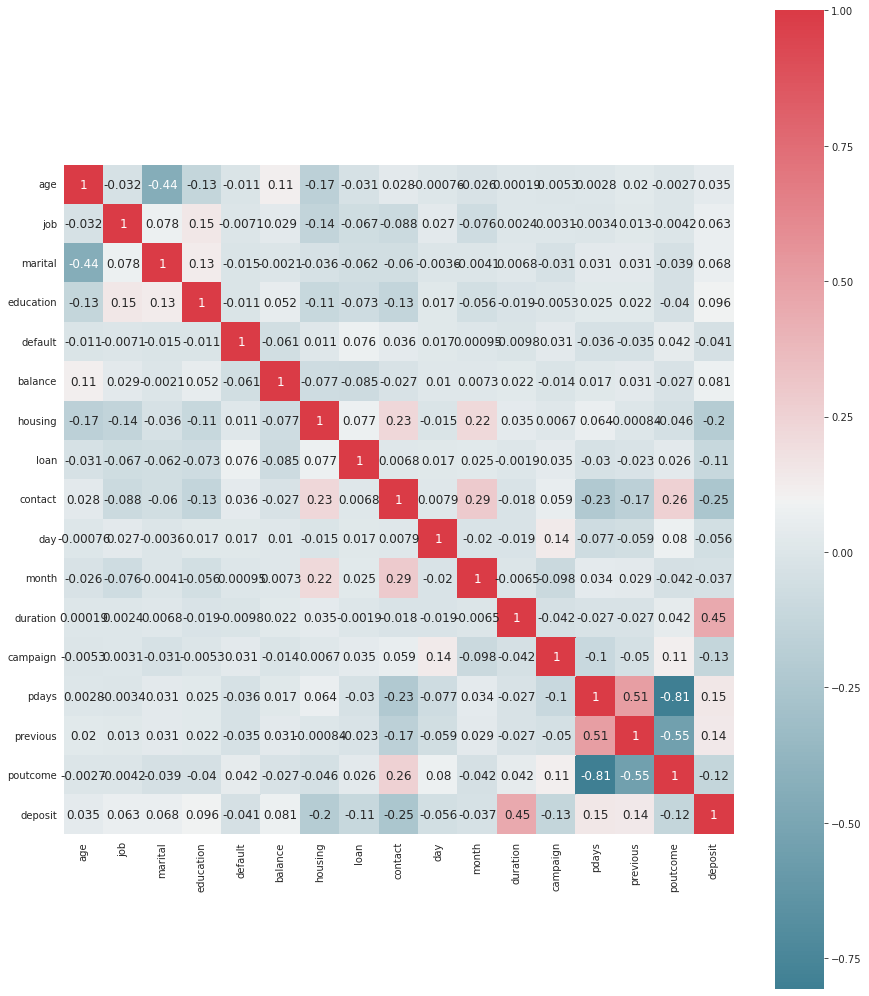

In [39]:
def plot_correlation_map(df):

    corr = df.corr()

    s, ax = plt.subplots(figsize=(15, 20))

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    s = sns.heatmap(corr,
                    cmap=cmap,
                    square=True,
                    cbar_kws={'shrink': .9},
                    ax=ax,
                    annot=True,
                    annot_kws={'fontsize': 12})


plot_correlation_map(df)

In [40]:
from itertools import cycle
import plotly.graph_objects as go

palette = cycle(["#ffd670", "#70d6ff", "#ff4d6d", "#8338ec", "#90cf8e"])
targ = df.corrwith(df['deposit'], axis=0)
val = [str(round(v, 1) * 100) + '%' for v in targ.values]
fig = go.Figure()
fig.add_trace(
    go.Bar(y=targ.index,
           x=targ.values,
           orientation='h',
           text=val,
           marker_color=next(palette)))
fig.update_layout(title="Correlation of variables with Target",
                  width=1000,
                  height=500,
                  paper_bgcolor='rgb(0,0,0,0)',
                  plot_bgcolor='rgb(0,0,0,0)')

In [41]:
df1 = df[df['deposit'] == 'yes']
df2 = df[df['deposit'] == 'no']

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


IndexError: ignored

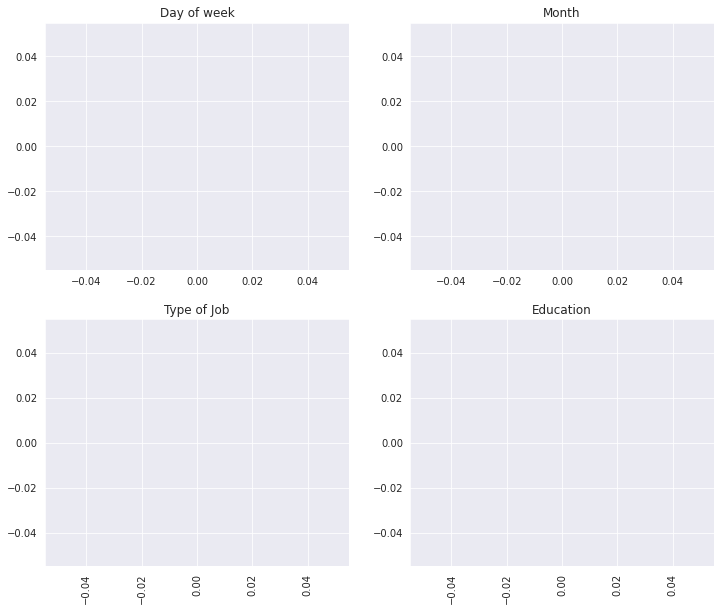

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(df1['day'].unique(),height = df1['day'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(df2['day'].unique(),height = df2['day'].value_counts(),bottom = df1['day'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(df1['month'].unique(),height = df1['month'].value_counts(),color='#000000')
ax[0, 1].bar(df2['month'].unique(),height = df2['month'].value_counts(),bottom = df1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(df1['job'].unique(),height = df1['job'].value_counts(),color='#000000')
ax[1, 0].bar(df1['job'].unique(),height = df2['job'].value_counts()[df1['job'].value_counts().index],bottom = df1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(df1['education'].unique(),height = df1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(df1['education'].unique(),height = df2['education'].value_counts()[df1['education'].value_counts().index],bottom = df1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

IndexError: ignored

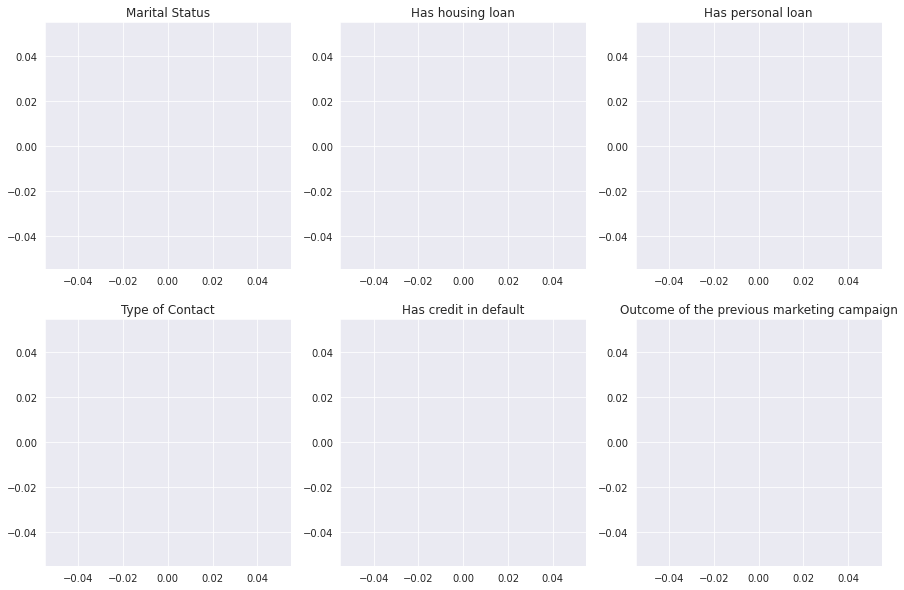

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(df1['marital'].unique(),height = df1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(df1['marital'].unique(),height = df2['marital'].value_counts()[df1['marital'].value_counts().index],bottom = df1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(df1['housing'].unique(),height = df1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(df1['housing'].unique(),height = df2['housing'].value_counts()[df1['housing'].value_counts().index],bottom = df1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(df1['loan'].unique(),height = df1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(df1['loan'].unique(),height = df2['loan'].value_counts()[df1['loan'].value_counts().index],bottom = df1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(df1['contact'].unique(),height = df1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(df1['contact'].unique(),height = df2['contact'].value_counts()[df1['contact'].value_counts().index],bottom = df1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(df1['default'].unique(),height = df1['default'].value_counts(),color='#000000')
ax[1, 1].bar(df1['default'].unique(),height = df2['default'].value_counts()[df1['default'].value_counts().index],bottom = df1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(df1['poutcome'].unique(),height = df1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(df1['poutcome'].unique(),height = df2['poutcome'].value_counts()[df1['poutcome'].value_counts().index],bottom = df1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

IndexError: ignored

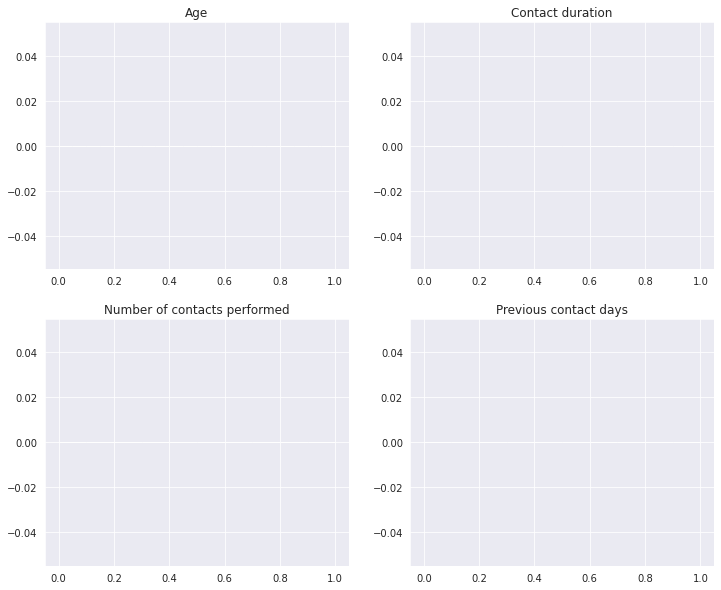

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(df2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(df1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(df2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(df1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')
ax[1, 0].hist(df2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(df1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')
ax[1, 1].hist(df2[df2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(df1[df1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

In [46]:
predictors = df.iloc[:,0:20]


In [47]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [48]:
from sklearn import preprocessing
X = df.drop(columns=["deposit"],axis=1)
y = df[["deposit"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_norm, X_test_norm = preprocessing.normalize(X_train), preprocessing.normalize(X_test)

In [49]:
perp_model = lm.Perceptron()
perp_model.fit(X_train,y_train)
y_pred = perp_model.predict(X_test)
print("Accuracy: ",(accuracy_score(y_test, y_pred)))

Accuracy:  0.6918483129292327


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [50]:
X_train_norm, X_test_norm = preprocessing.normalize(X_train), preprocessing.normalize(X_test)
batch_size = 10
num_classes = 10
epochs = 50
stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model = Sequential([
    Dense(256, activation='relu', input_dim= 16),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               4352      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 136,449
Trainable params: 136,449
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train_norm,
                 y_train,
                 epochs=50,
                 batch_size=10,
                 validation_split=0.2,
                 callbacks=[])

Epoch 1/50
625/625 [==============================] - 5s 6ms/step - loss: 0.5763 - accuracy: 0.6958 - val_loss: 0.5132 - val_accuracy: 0.7556
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5292 - accuracy: 0.7448 - val_loss: 0.5257 - val_accuracy: 0.7518
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5138 - accuracy: 0.7574 - val_loss: 0.5008 - val_accuracy: 0.7575
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5099 - accuracy: 0.7563 - val_loss: 0.4857 - val_accuracy: 0.7818
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5044 - accuracy: 0.7568 - val_loss: 0.4851 - val_accuracy: 0.7748
Epoch 6/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5012 - accuracy: 0.7603 - val_loss: 0.4777 - val_accuracy: 0.7908
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 0.4987 - accuracy: 0.7627 - val_loss: 0.4809 - val_accuracy: 0.7786
Epoch 

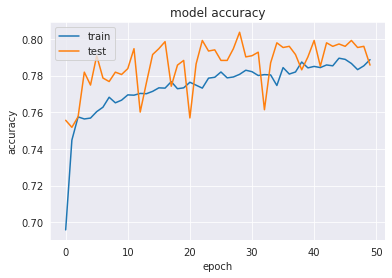

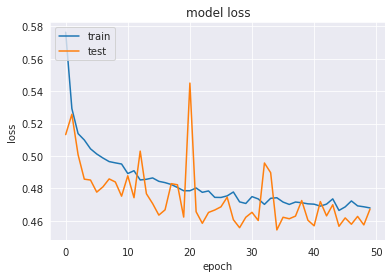

In [52]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

105/105 [==============================] - 1s 4ms/step


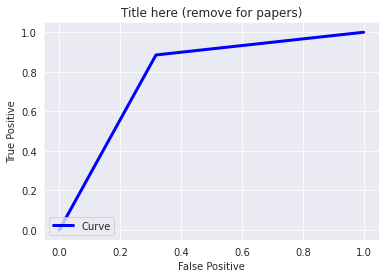

In [53]:
from sklearn import metrics
predicted_labels = (model.predict(X_test_norm))
predictions = [float(round(x[0])) for x in predicted_labels]
FPR, TPR, cutoffs = metrics.roc_curve(y_test,predictions,pos_label=1) 
bp_x = FPR
bp_y = TPR

plt.plot(bp_x, bp_y, linewidth=3,
         color="blue", label=r"Curve")
plt.xlabel(r"False Positive")
plt.ylabel(r"True Positive")
plt.title(r"Title here (remove for papers)")
plt.legend(loc="lower left")
plt.show()
plt.show()

In [54]:
score = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7760525345802307


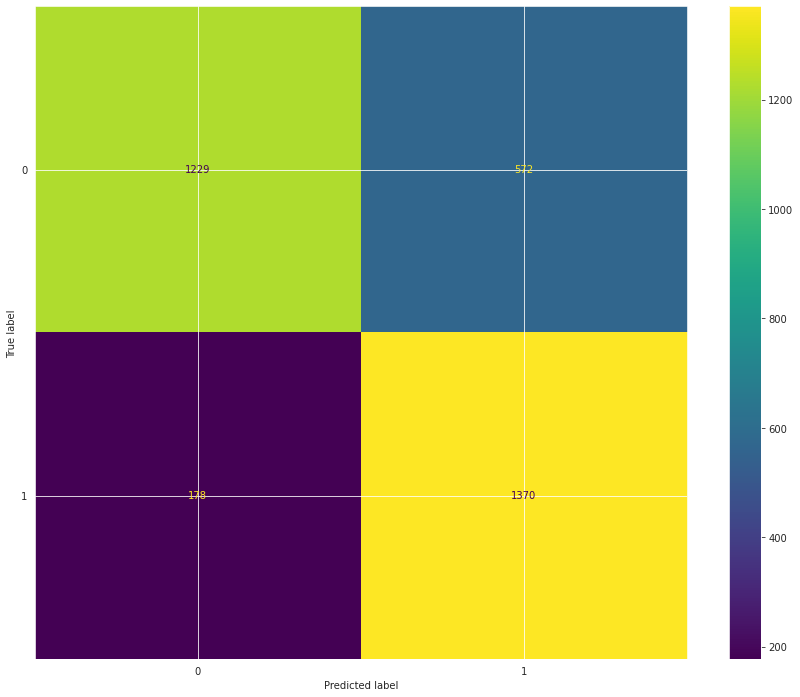

In [55]:
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
def conf_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, labels=range(0,2))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(0,2))
    fig, ax = plt.subplots(figsize=(15,12))
    disp.plot(ax=ax)
    plt.show()
conf_matrix(y_test, predictions, model)

In [56]:
hist1 = model.fit(X_train,
                 y_train,
                 epochs=50,
                 batch_size=10,
                 validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 4s 6ms/step - loss: 506.4525 - accuracy: 0.6970 - val_loss: 259.7521 - val_accuracy: 0.6283
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 62.4764 - accuracy: 0.6754 - val_loss: 28.4660 - val_accuracy: 0.6456
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 12.1151 - accuracy: 0.6930 - val_loss: 2.5813 - val_accuracy: 0.7115
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 5.4024 - accuracy: 0.7123 - val_loss: 1.1228 - val_accuracy: 0.7767
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 3.1693 - accuracy: 0.7336 - val_loss: 0.8741 - val_accuracy: 0.7857
Epoch 6/50
625/625 [==============================] - 3s 5ms/step - loss: 2.2103 - accuracy: 0.7614 - val_loss: 0.8069 - val_accuracy: 0.7837
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 2.5500 - accuracy: 0.7646 - val_loss: 0.6694 - val_accuracy: 0.7857

In [57]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7333532571792603
